# 1. 폴더 정리

* 제공해드린 animals10.zip의 압축을 풀어 그 내용을 살펴보시고, 폴더 구조를 학습에 알맞도록 재구성해주세요
* 특히 각 클래스마다 약 30% 정도의 이미지를 test 폴더에 할당해주세요
* 중간중간 헷갈리다면 이것저것 확인하는 코드를 거쳐보세요 (ex. flat_test[:5]로 앞의 다섯값 확인)
* 궁금한 점이 있을 경우, 슬랙 질문 채널 활용을 적극 권장합니다.

In [9]:
### Guideline for convenience ###
# 압축 풀기
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
!pwd

/content


In [12]:
import os
import glob
import shutil

In [13]:
!unzip -qq "/content/drive/MyDrive/Colab Notebooks/animals10.zip"

In [14]:
!ls

Animals-10  drive  sample_data


In [15]:
names = ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']

In [16]:
tot_file_count = {}
tot_filename_list = {}

In [17]:
for each_class in names:
  file_jpg = glob.glob(f'./Animals-10/{each_class}/*.jpg')
  file_jpeg = glob.glob(f'./Animals-10/{each_class}/*.jpeg')
  file_png = glob.glob(f'./Animals-10/{each_class}/*.png')

  file_list = []
  file_list.extend(file_jpg) # append가 아닌 extend 함수를 활용
  file_list.extend(file_jpeg)
  file_list.extend(file_png)

  tot_file_count[each_class] = len(file_list)
  tot_filename_list[each_class] = file_list

  print(f'{each_class}: {tot_file_count[each_class]}')

butterfly: 2112
cat: 1668
chicken: 3098
cow: 1866
dog: 4863
elephant: 1446
horse: 2623
sheep: 1820
spider: 4821
squirrel: 1862


In [18]:
tot_file_count

{'butterfly': 2112,
 'cat': 1668,
 'chicken': 3098,
 'cow': 1866,
 'dog': 4863,
 'elephant': 1446,
 'horse': 2623,
 'sheep': 1820,
 'spider': 4821,
 'squirrel': 1862}

In [19]:
tot_filename_list

{'butterfly': ['./Animals-10/butterfly/butterfly (231).jpg',
  './Animals-10/butterfly/butterfly (419).jpg',
  './Animals-10/butterfly/butterfly (320).jpg',
  './Animals-10/butterfly/butterfly (242).jpg',
  './Animals-10/butterfly/butterfly (379).jpg',
  './Animals-10/butterfly/butterfly (420).jpg',
  './Animals-10/butterfly/butterfly (23).jpg',
  './Animals-10/butterfly/butterfly (348).jpg',
  './Animals-10/butterfly/butterfly (251).jpg',
  './Animals-10/butterfly/butterfly (78).jpg',
  './Animals-10/butterfly/butterfly (357).jpg',
  './Animals-10/butterfly/butterfly (418).jpg',
  './Animals-10/butterfly/butterfly (412).jpg',
  './Animals-10/butterfly/butterfly (83).jpg',
  './Animals-10/butterfly/butterfly (82).jpg',
  './Animals-10/butterfly/butterfly (77).jpg',
  './Animals-10/butterfly/butterfly (149).jpg',
  './Animals-10/butterfly/butterfly (6).jpg',
  './Animals-10/butterfly/butterfly (19).jpg',
  './Animals-10/butterfly/butterfly (347).jpg',
  './Animals-10/butterfly/butterfly

In [20]:
test_file_count = {}
for each_class in names:
  test_file_count[each_class] = round(tot_file_count[each_class] * 0.3)
test_file_count

{'butterfly': 634,
 'cat': 500,
 'chicken': 929,
 'cow': 560,
 'dog': 1459,
 'elephant': 434,
 'horse': 787,
 'sheep': 546,
 'spider': 1446,
 'squirrel': 559}

In [21]:
for each_class in names:
  os.makedirs(f'./train/{each_class}', exist_ok=True)
  os.makedirs(f'./test/{each_class}', exist_ok=True)

In [22]:
import random
def split(img_list, test_count, train_path, test_path):
  # test sample 먼저 골라주기
  test_files=[]
  for i in random.sample(img_list, test_count):
    test_files.append(i)

  # 위에서 고르지 않은 이미지들을 train 담을 이미지 리스트로 저장
  train_files = [x for x in img_list if x not in test_files]

  # 복사하기 -> shutil : 파일 복사하는 함수
  for k in train_files:
    shutil.copy(k, train_path)
  
  for c in test_files:
    shutil.copy(c, test_path)

  print('train 폴더 이미지 개수 : {}\ntest 폴더 이미지 개수 : {}'.format(len(glob.glob(train_path+'/*')),len(glob.glob(test_path+'/*'))))

In [23]:
for each_class in names:
  split(tot_filename_list[each_class], test_file_count[each_class], f'./train/{each_class}', f'./test/{each_class}')

train 폴더 이미지 개수 : 1478
test 폴더 이미지 개수 : 634
train 폴더 이미지 개수 : 1168
test 폴더 이미지 개수 : 500
train 폴더 이미지 개수 : 2169
test 폴더 이미지 개수 : 929
train 폴더 이미지 개수 : 1306
test 폴더 이미지 개수 : 560
train 폴더 이미지 개수 : 3404
test 폴더 이미지 개수 : 1459
train 폴더 이미지 개수 : 1012
test 폴더 이미지 개수 : 434
train 폴더 이미지 개수 : 1836
test 폴더 이미지 개수 : 787
train 폴더 이미지 개수 : 1274
test 폴더 이미지 개수 : 546
train 폴더 이미지 개수 : 3375
test 폴더 이미지 개수 : 1446
train 폴더 이미지 개수 : 1303
test 폴더 이미지 개수 : 559


In [24]:
# 각 클래스별 파일 개수 확인 -> 변수로 해당 개수 저장
# Tip) 클래스가 10개이므로 각 클래스마다 똑같은 내용의 코드를 계속 써야할까요? 클래스 이름을 리스트로 저장해 for문을 돌리면서 코드를 재사용하는건 어떨까요?

In [ ]:
# test에 넣을 이미지 개수 계산

In [ ]:
# train, test 폴더 경로 선언 & 만들기

In [ ]:
# train, test 폴더로 이미지 split해서 알맞게 집어넣기

# 2. CNN 모델
수업 코드에 '모델 성능에 대한 고민!!' 부분을 참고해서 **test 이미지 기준 최소 80% 이상**의 모델이 나올 수 있도록 학습을 진행해주세요.
* 중간중간 헷갈리다면 이것저것 확인하는 코드를 거쳐보세요
* 90% 이상의 모델이 이상적이긴 합니다
* 궁금한 점이 있을 경우, 슬랙 질문 채널 활용을 적극 권장합니다.

전반적으로 수업 코드와 비슷하게 짜면 되는데, 생각해봐야 할 것은
* 모든 이미지를 내가 정의하는 하나의 모델에 넣어야함
* 그말은 input 데이터의 차원이 항상 동일해야 된다는 말
* 그런데 과연 내가 가지고 있는 이미지들의 사이즈가 모두 같을까? - 대략 얼마정도 사이즈 가지고 있는지 코드로 확인해보면 더 좋음 (shape 확인)
* 이미지 사이즈를 통일시키기 위해서는 어떻게 해야할까? - transforms의 Resize, RandomCrop 써볼까?
* 동물 이미지에 적합한 Augmentation은 무엇이 있을까?

In [25]:
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [26]:
test_img_path = './Animals-10/butterfly/butterfly (5).png' # 바꿔보면서 확인
test_img = Image.open(test_img_path)

(440, 640, 4)


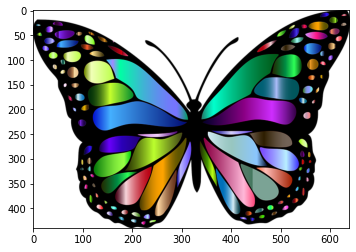

In [27]:
test_img_np = np.array(test_img)
imshow(test_img_np)
print(test_img_np.shape)

In [28]:
import torch
import torchvision
import torchvision.transforms as transforms

In [29]:
transform_train = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224), # 모든 이미지 사이즈를 224*224로 통일
    transforms.ColorJitter(brightness=0.2),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(20),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

In [30]:
transform_test = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

In [31]:
train_dataset = torchvision.datasets.ImageFolder(
    root = './train',
    transform = transform_train
)
test_dataset = torchvision.datasets.ImageFolder(
    root = './test',
    transform = transform_test
)

In [32]:
train_dataset[0][0].shape

torch.Size([3, 224, 224])

In [33]:
train_dataset[0][0]

tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.8044, -1.8044,  ..., -1

In [34]:
train_dataloader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size = 32,
    shuffle=True,
    num_workers=2
)

In [35]:
test_dataloader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size = 32,
    shuffle=False,
    num_workers=2
)

In [36]:
import torch.nn as nn

In [37]:
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()

        self.convnet = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1, stride=1), # [batch_size, 3, 224, 224] -> [batch_size, 32, 224, 224]
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1, stride=1), # [batch_size, 32, 224, 224] -> [batch_size, 32, 224, 224]
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2), # [batch_size, 32, 224, 224] -> [batch_size, 32, 112, 112]
            
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1, stride=1), # [batch_size, 32, 112, 112] -> [batch_size, 64, 112, 112]
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1, stride=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2), # [batch_size, 64, 112, 112] -> [batch_size, 64, 56, 56]

            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1, stride=1), # [batch_size, 64, 56, 56] -> [batch_size, 128, 56, 56]
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1, stride=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2), # [batch_size, 128, 56, 56] -> [batch_size, 128, 28, 28]

            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1, stride=1), # [batch_size, 128, 28, 28] -> [batch_size, 256, 28, 28]
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1, stride=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2), # [batch_size, 256, 28, 28] -> [batch_size, 256, 14, 14]
        )

        self.fclayer = nn.Sequential(
            nn.Linear(256*14*14, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.3),
            nn.Linear(4096, 1024),
            nn.ReLU(inplace=True),
            nn.Dropout(0.3),
            nn.Linear(1024, 10)
        )

        # weight initialization (not necessary, but for better result)
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(
                    m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)

    def forward(self,x) :
        x = self.convnet(x)
        x = x.view(x.size(0), -1)
        x = self.fclayer(x)
        return x

In [38]:
# Device 선언 (GPU 권장)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [39]:
from torchsummary import summary
test_model = MyModel().to(device) # 모델 객체 선언
summary(test_model, (3,224,224), batch_size=32)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [32, 32, 224, 224]             896
       BatchNorm2d-2         [32, 32, 224, 224]              64
              ReLU-3         [32, 32, 224, 224]               0
            Conv2d-4         [32, 32, 224, 224]           9,248
       BatchNorm2d-5         [32, 32, 224, 224]              64
              ReLU-6         [32, 32, 224, 224]               0
         MaxPool2d-7         [32, 32, 112, 112]               0
            Conv2d-8         [32, 64, 112, 112]          18,496
       BatchNorm2d-9         [32, 64, 112, 112]             128
             ReLU-10         [32, 64, 112, 112]               0
           Conv2d-11         [32, 64, 112, 112]          36,928
      BatchNorm2d-12         [32, 64, 112, 112]             128
             ReLU-13         [32, 64, 112, 112]               0
        MaxPool2d-14           [32, 64,

In [40]:
mymodel = MyModel().to(device)
mymodel

MyModel(
  (convnet): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(64, 128, k

In [41]:
criterion = nn.CrossEntropyLoss().to(device) # criterion (loss func)도 device 위에서
optimizer = torch.optim.Adam(mymodel.parameters(), lr=0.001)

In [42]:
seq_train_loss = []
seq_test_loss = []
seq_train_acc = []
seq_test_acc = []

In [43]:
def train(epoch):
    print(f'\n[ Train epoch: {epoch+1} ]')

    mymodel.train() # train은 항상 이걸 지정하고 시작! - Dropout, Batch Normalization 등의 효과를 적용하고 진행하기 위함

    running_loss = 0.0
    batch_losses = []
    total = 0
    correct = 0

    for batch_idx, (inputs, targets) in enumerate(train_dataloader):
        inputs, targets = inputs.to(device), targets.to(device) # dataloader의 input image와 label도 device에 넣어줘야됨
        
        # DL 학습 기본 코드
        optimizer.zero_grad() # gradient 초기화
        outputs = mymodel(inputs) # 현재 batch의 inputs을 모델에 넣어 outputs 추출 (확률값)
        loss = criterion(outputs, targets) # 추출한 outputs와 원래 label인 targets 사이 loss 계산
        loss.backward() # 계산한 loss 기반으로 gradient 값 계산
        optimizer.step() # weight parameter update

        total += targets.size(0) # batch 데이터 개수 더하기
        running_loss += loss.item()
        batch_losses.append(loss.item())
        
        _, predicted = outputs.max(1) # 확률값 가장 높게 나타난 클래스
        correct += (predicted == targets).sum().item() # 현재 batch 내에서 알맞게 분류한 이미지 개수 더하기
        
        if batch_idx % 100 == 99:
            print(f'\nCurrent batch: {str(batch_idx+1)}')
            print(f'Average train loss of recent 100 batches: {running_loss / 100}') # 이렇게 출력하는 것이 꼭 필요한 것은 아니지만, 중간중간 확인을 위해 매우 권장
            running_loss = 0.0

    avg_loss = sum(batch_losses) / len(batch_losses)
    seq_train_loss.append(avg_loss)
    seq_train_acc.append(100*correct/total)
    print('\nTotal train accuarcy:', 100. * correct / total) # 전체 데이터 개수에서 맞게 예측한 비율
    print('Total train loss:', avg_loss)

In [44]:
def test(epoch):
    print(f'\n[ Test epoch: {epoch+1} ]')

    mymodel.eval() # eval은 항상 이걸 지정하고 시작! - Dropout, Batch Normalization 등의 효과를 적용하지 않기 위함!
                   # ex. evaluation 할때는 Dropout 없이 지금까지 학습한 모든 node를 활용해서 진행해야됨

    loss = 0
    batch_losses = []
    correct = 0
    total = 0

    with torch.no_grad(): # gradient update 안함 - eval과 torch.no_grad는 하나의 세트
        for batch_idx, (inputs, targets) in enumerate(test_dataloader):
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = mymodel(inputs)
            loss = criterion(outputs, targets)
            batch_losses.append(loss.item())

            total += targets.size(0)
            _, predicted = outputs.max(1)
            correct += (predicted == targets).sum().item()

    avg_loss = sum(batch_losses) / len(batch_losses)
    seq_test_loss.append(avg_loss)
    seq_test_acc.append(100 * correct / total)
    print('\nTest accuarcy:', 100. * correct / total)
    print('Test average loss:', avg_loss)

In [45]:
num_epoch = 15

for epoch in range(0, num_epoch):
    train(epoch)
    test(epoch)


[ Train epoch: 1 ]

Current batch: 100
Average train loss of recent 100 batches: 3.745011911392212

Current batch: 200
Average train loss of recent 100 batches: 2.1996776378154754

Current batch: 300
Average train loss of recent 100 batches: 2.171148096323013

Current batch: 400
Average train loss of recent 100 batches: 2.18218247294426

Current batch: 500
Average train loss of recent 100 batches: 2.156268074512482

Total train accuarcy: 22.575716234652116
Total train loss: 2.442443174633472

[ Test epoch: 1 ]

Test accuarcy: 26.66157372039725
Test average loss: 2.063573574632164

[ Train epoch: 2 ]

Current batch: 100
Average train loss of recent 100 batches: 2.0984931087493894

Current batch: 200
Average train loss of recent 100 batches: 2.0675579226017

Current batch: 300
Average train loss of recent 100 batches: 1.9989701342582702

Current batch: 400
Average train loss of recent 100 batches: 1.957567982673645

Current batch: 500
Average train loss of recent 100 batches: 1.98052287

In [46]:
del seq_train_loss[0]
del seq_test_loss[0]
del seq_train_acc[0]
del seq_test_acc[0]

ValueError: ignored

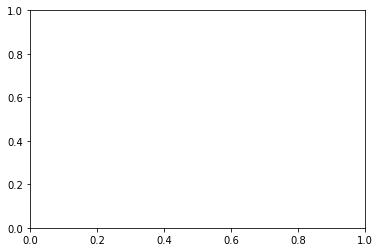

In [49]:
plt.plot(range(num_epoch), seq_train_acc, label="Train Accuracy")
plt.plot(range(num_epoch), seq_test_acc, label="Test Accuracy")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

그림 그리는 데에서 문제가 생깁니다...

[batch_size, 256, 14, 14] 에서 더 나아가지 않고 모델을 만들었더니 EPOCH 15일 때 예시 답안보다 정확성이 떨어진다는 것을 볼 수 있다. + learning rate를 0.005로 해봤더니 정확성이 30% 언저리를 넘어가지 않았다. 